In [1]:
import pandas as pd

df=pd.read_csv("advertising.csv")
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [3]:
# Train models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [4]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest")


Linear Regression Performance:
RMSE: 1.7052146229349223
R2 Score: 0.9059011844150826

Random Forest Performance:
RMSE: 1.1989298770153327
R2 Score: 0.9534827934927883


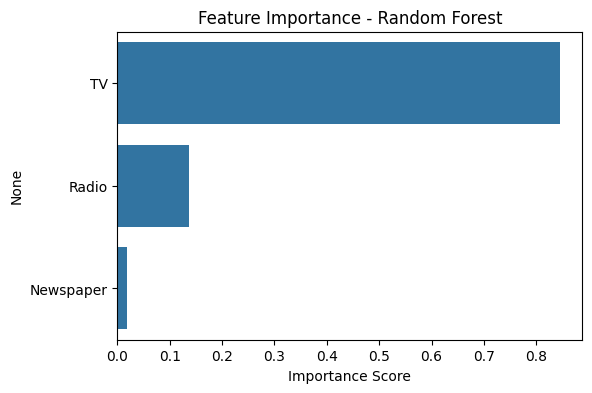

In [5]:
# Feature Importance (Insight)
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()